In [176]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [177]:
data= pd.read_csv('spotify_dataset.csv')
data.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [178]:
data.isnull().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

In [179]:
#data = data.drop(['Index','Week of Highest Charting','Song Name','Streams','Song ID','Weeks Charted'],axis=1)
#data.head()

In [180]:
data.dtypes

Index                         int64
Highest Charting Position     int64
Number of Times Charted       int64
Week of Highest Charting     object
Song Name                    object
Streams                      object
Artist                       object
Artist Followers             object
Song ID                      object
Genre                        object
Release Date                 object
Weeks Charted                object
Popularity                   object
Danceability                 object
Energy                       object
Loudness                     object
Speechiness                  object
Acousticness                 object
Liveness                     object
Tempo                        object
Duration (ms)                object
Valence                      object
Chord                        object
dtype: object

In [181]:
#to_numeric  --to convert to numeric form or float
#errors='coerce'--to convert non numerical values to nan values
data['Artist Followers']=pd.to_numeric(data['Artist Followers'],errors='coerce')
data['Popularity']=pd.to_numeric(data['Popularity'],errors='coerce')
data['Danceability']=pd.to_numeric(data['Danceability'],errors='coerce')
data['Energy']=pd.to_numeric(data['Energy'],errors='coerce')
data['Loudness']=pd.to_numeric(data['Loudness'],errors='coerce')
data['Speechiness']=pd.to_numeric(data['Speechiness'],errors='coerce')
data['Acousticness']=pd.to_numeric(data['Acousticness'],errors='coerce')
data['Liveness']=pd.to_numeric(data['Liveness'],errors='coerce')
data['Tempo']=pd.to_numeric(data['Tempo'],errors='coerce')
data['Duration (ms)']=pd.to_numeric(data['Duration (ms)'],errors='coerce')
data['Valence']=pd.to_numeric(data['Valence'],errors='coerce')
data['Streams']=pd.to_numeric(data['Streams'],errors='coerce')

In [182]:
data['Release Date']=pd.to_datetime(data['Release Date'],infer_datetime_format=True,errors='coerce')
data['month']=data['Release Date'].dt.month


In [183]:
Song_Name=pd.DataFrame(data['Song Name'])

In [184]:
data=data.drop(['Streams','Index','Song ID','Weeks Charted','Week of Highest Charting',
               'Weeks Charted','Release Date','Song Name'],axis=1)
data.head()

,Highest Charting Position,Number of Times Charted,Artist,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,month
0,1,8,Måneskin,3377762.0,"['indie rock italiano', 'italian pop']",100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B,12.0
1,2,3,The Kid LAROI,2230022.0,['australian hip hop'],99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db,7.0
2,1,11,Olivia Rodrigo,6266514.0,['pop'],99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A,5.0
3,3,5,Ed Sheeran,83293380.0,"['pop', 'uk pop']",98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B,6.0
4,5,1,Lil Nas X,5473565.0,"['lgbtq+ hip hop', 'pop rap']",96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,D#/Eb,7.0


In [185]:
data.isnull().sum()

Highest Charting Position     0
Number of Times Charted       0
Artist                        0
Artist Followers             11
Genre                         0
Popularity                   11
Danceability                 11
Energy                       11
Loudness                     11
Speechiness                  11
Acousticness                 11
Liveness                     11
Tempo                        11
Duration (ms)                11
Valence                      11
Chord                         0
month                        11
dtype: int64

In [186]:
data=data.dropna()

In [187]:
le_Artist =LabelEncoder()
le_Genre =LabelEncoder()
le_Chord =LabelEncoder()
le_Song =LabelEncoder()

data['Artist'] =le_Artist.fit_transform(data['Artist'])
data['Genre'] =le_Genre.fit_transform(data['Genre'])  
data['Chord'] =le_Chord.fit_transform(data['Chord'])
#data['Song Name'] =le_Song.fit_transform(data['Song Name'])

data.head()

,Highest Charting Position,Number of Times Charted,Artist,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,month
0,1,8,469,3377762.0,276,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,2,12.0
1,2,3,643,2230022.0,63,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,4,7.0
2,1,11,500,6266514.0,364,99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,0,5.0
3,3,5,203,83293380.0,363,98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,2,6.0
4,5,1,381,5473565.0,312,96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,6,7.0


In [188]:
Genre=data['Genre'].unique()
Genre.size

394

In [189]:
scaler =MinMaxScaler()
scaler_song =MinMaxScaler()
data['Highest Charting Position'] =scaler.fit_transform(data[['Highest Charting Position']])
data['Number of Times Charted'] =scaler.fit_transform(data[['Number of Times Charted']])
#data['Song Name'] =scaler_song.fit_transform(data[['Song Name']])
data['Artist'] =scaler.fit_transform(data[['Artist']])
data['Genre'] =scaler.fit_transform(data[['Genre']])
data['Popularity'] =scaler.fit_transform(data[['Popularity']])
data['Danceability'] =scaler.fit_transform(data[['Danceability']])
data['Energy'] =scaler.fit_transform(data[['Energy']])
data['Loudness'] =scaler.fit_transform(data[['Loudness']])
data['Speechiness'] =scaler.fit_transform(data[['Speechiness']])
data['Acousticness'] =scaler.fit_transform(data[['Acousticness']])
data['Liveness'] =scaler.fit_transform(data[['Liveness']])
data['Tempo'] =scaler.fit_transform(data[['Tempo']])
data['Duration (ms)'] =scaler.fit_transform(data[['Duration (ms)']])
data['Valence'] =scaler.fit_transform(data[['Valence']])
data['Chord'] =scaler.fit_transform(data[['Chord']])
data['month'] =scaler.fit_transform(data[['month']])

data.head()

,Highest Charting Position,Number of Times Charted,Artist,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,month
0,0.000000,0.049645,0.659634,3377762.0,0.702290,1.00,0.679518,0.814410,0.763187,0.031599,0.127744,0.360076,0.550500,0.325134,0.588173,0.181818,1.000000
1,0.005025,0.014184,0.904360,2230022.0,0.160305,0.99,0.531325,0.775109,0.737844,0.029159,0.038507,0.088401,0.777085,0.200129,0.470961,0.363636,0.545455
2,0.000000,0.070922,0.703235,6266514.0,0.926209,0.99,0.497590,0.665939,0.754339,0.151952,0.337005,0.069192,0.758164,0.265255,0.692714,0.000000,0.363636
3,0.010050,0.028369,0.285513,83293380.0,0.923664,0.98,0.792771,0.920306,0.804274,0.013476,0.047159,0.365383,0.500196,0.360046,0.590285,0.181818,0.454545
4,0.020101,0.000000,0.535865,5473565.0,0.793893,0.96,0.706024,0.709607,0.665679,0.044493,0.020397,0.032261,0.651368,0.325923,0.910243,0.545455,0.545455


# Correlation

<AxesSubplot:>

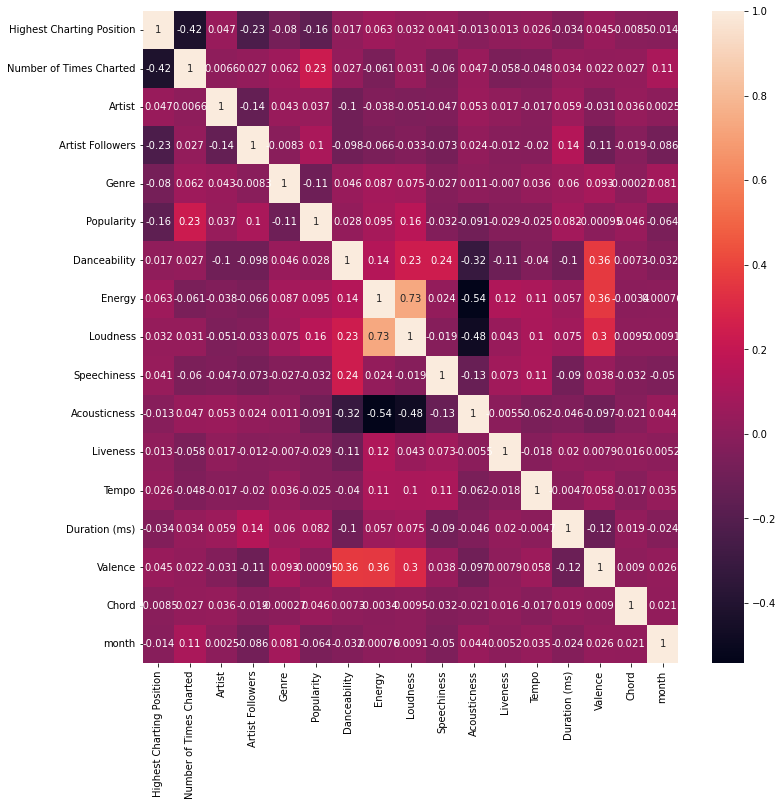

In [76]:
c=data.corr()
plt.figure(figsize=[12,12])
sns.heatmap(c,annot=True)

In [ ]:

print(data['Acousticness'].corr(data['Song Name']))
print(data['Artist'].corr(data['Song Name']))
#print(data['Artist Followers'].corr(data['Song Name']))
print(data['Duration (ms)'].corr(data['Song Name']))
print(data['Popularity'].corr(data['Song Name']))
print(data['Number of Times Charted'].corr(data['Song Name']))
print('***')

print(data['Liveness'].corr(data['Song Name']))
print(data['Speechiness'].corr(data['Song Name']))
print(data['Tempo'].corr(data['Song Name']))
print(data['Valence'].corr(data['Song Name']))
print(data['Genre'].corr(data['Song Name']))
print(data['Danceability'].corr(data['Song Name']))
print(data['Loudness'].corr(data['Song Name']))
print(data['Chord'].corr(data['Song Name']))
print(data['Energy'].corr(data['Song Name']))
print(data['Highest Charting Position'].corr(data['Song Name']))


# Content-based Filtering using KMeans

In [ ]:
sse=[]
for i in range(2,50):
    km=KMeans(n_clusters=i)
    km.fit(data)
    sse.append(km.inertia_)

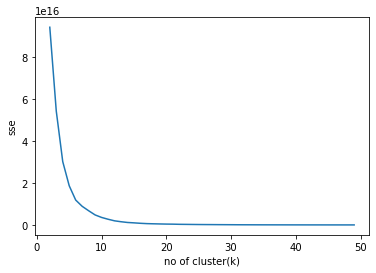

In [17]:
plt.xlabel('no of cluster(k)')
plt.ylabel('sse')
plt.plot(range(2, 50), sse[:])

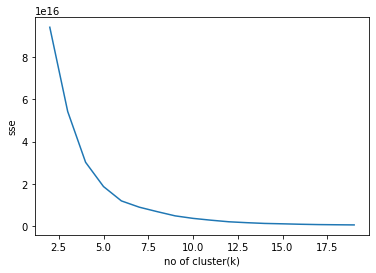

In [18]:
plt.xlabel('no of cluster(k)')
plt.ylabel('sse')
plt.plot(range(2, 20), sse[:18])

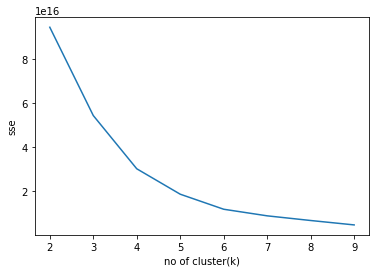

In [19]:
plt.xlabel('no of cluster(k)')
plt.ylabel('sse')
plt.plot(range(2, 10), sse[:8])

In [190]:
km_model =KMeans(n_clusters=6)
prediction =km_model.fit_predict(data)

In [191]:
km_model.cluster_centers_

array([[4.69954915e-01, 5.74501226e-02, 5.19476977e-01, 7.57636350e+06,
        5.28394093e-01, 7.13831776e-01, 6.75458845e-01, 6.38513651e-01,
        7.15378693e-01, 1.57916022e-01, 2.16395263e-01, 1.77364046e-01,
        5.06413806e-01, 3.02622341e-01, 5.12975802e-01, 4.84069669e-01,
        4.78547154e-01],
       [3.09266923e-01, 3.69733000e-02, 5.44355506e-01, 4.69499232e+07,
        5.63388714e-01, 6.86470588e-01, 5.88811127e-01, 5.49656435e-01,
        6.59624015e-01, 9.86829967e-02, 3.86652806e-01, 1.75768302e-01,
        4.69350811e-01, 3.33515231e-01, 4.48958010e-01, 4.92647059e-01,
        3.64973262e-01],
       [2.44684963e-01, 1.40207310e-01, 1.25824949e-01, 7.21621504e+07,
        5.96007046e-01, 7.51538462e-01, 6.36144578e-01, 5.72136379e-01,
        7.07301564e-01, 8.11097012e-02, 2.67110900e-01, 1.40421554e-01,
        4.63679445e-01, 2.99733129e-01, 4.70376086e-01, 4.33566434e-01,
        5.87412587e-01],
       [3.51710936e-01, 8.67274569e-02, 4.33996383e-01, 3.303

In [192]:
data['clusters']=prediction
data

,Highest Charting Position,Number of Times Charted,Artist,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,month,clusters
0,0.000000,0.049645,0.659634,3377762.0,0.702290,1.00,0.679518,0.814410,0.763187,0.031599,0.127744,0.360076,0.550500,0.325134,0.588173,0.181818,1.000000,5
1,0.005025,0.014184,0.904360,2230022.0,0.160305,0.99,0.531325,0.775109,0.737844,0.029159,0.038507,0.088401,0.777085,0.200129,0.470961,0.363636,0.545455,5
2,0.000000,0.070922,0.703235,6266514.0,0.926209,0.99,0.497590,0.665939,0.754339,0.151952,0.337005,0.069192,0.758164,0.265255,0.692714,0.000000,0.363636,0
3,0.010050,0.028369,0.285513,83293380.0,0.923664,0.98,0.792771,0.920306,0.804274,0.013476,0.047159,0.365383,0.500196,0.360046,0.590285,0.181818,0.454545,2
4,0.020101,0.000000,0.535865,5473565.0,0.793893,0.96,0.706024,0.709607,0.665679,0.044493,0.020397,0.032261,0.651368,0.325923,0.910243,0.545455,0.545455,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,0.974874,0.000000,0.275668,27167675.0,0.455471,0.79,0.737349,0.705240,0.717713,0.053671,0.002600,0.141462,0.437422,0.321120,0.608237,0.000000,0.454545,3
1552,0.979899,0.000000,0.427567,15019109.0,0.964377,0.66,0.455422,0.890830,0.826354,0.071910,0.241429,0.332484,0.666347,0.272035,0.720169,0.181818,0.818182,4
1553,0.984925,0.000000,0.182841,22698747.0,0.394402,0.81,0.740964,0.512009,0.780993,0.007900,0.185090,0.119176,0.367509,0.335434,0.382260,0.454545,0.000000,4
1554,0.989950,0.000000,0.239100,208630.0,0.213740,0.60,0.821687,0.541485,0.680037,0.041241,0.250484,0.172238,0.677031,0.219802,0.896515,0.727273,0.727273,5


In [193]:
data['Song Name']=Song_Name
data.head()

,Highest Charting Position,Number of Times Charted,Artist,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,month,clusters,Song Name
0,0.000000,0.049645,0.659634,3377762.0,0.702290,1.00,0.679518,0.814410,0.763187,0.031599,0.127744,0.360076,0.550500,0.325134,0.588173,0.181818,1.000000,5,Beggin'
1,0.005025,0.014184,0.904360,2230022.0,0.160305,0.99,0.531325,0.775109,0.737844,0.029159,0.038507,0.088401,0.777085,0.200129,0.470961,0.363636,0.545455,5,STAY (with Justin Bieber)
2,0.000000,0.070922,0.703235,6266514.0,0.926209,0.99,0.497590,0.665939,0.754339,0.151952,0.337005,0.069192,0.758164,0.265255,0.692714,0.000000,0.363636,0,good 4 u
3,0.010050,0.028369,0.285513,83293380.0,0.923664,0.98,0.792771,0.920306,0.804274,0.013476,0.047159,0.365383,0.500196,0.360046,0.590285,0.181818,0.454545,2,Bad Habits
4,0.020101,0.000000,0.535865,5473565.0,0.793893,0.96,0.706024,0.709607,0.665679,0.044493,0.020397,0.032261,0.651368,0.325923,0.910243,0.545455,0.545455,0,INDUSTRY BABY (feat. Jack Harlow)


# predicting

In [194]:
var22='good 4 u'
column=data[data['Song Name']=='good 4 u']
cl_data=column['clusters']
cl_list=list(cl_data)
cl_number=cl_list[0]
cl_number

0

In [197]:
cl_data=data[data['clusters']==cl_number]
cl_data2=pd.DataFrame(cl_data['Song Name'])
final=list(cl_data2['Song Name'])
final

['good 4 u',
 'INDUSTRY BABY (feat. Jack Harlow)',
 'MONTERO (Call Me By Your Name)',
 'Kiss Me More (feat. SZA)',
 'Todo De Ti',
 'traitor',
 'deja vu',
 'Need To Know',
 "Ain't Shit",
 'drivers license',
 'happier',
 'Pepas',
 'favorite crime',
 'RAPSTAR',
 'You Right',
 '911 - Remix',
 'jealousy, jealousy',
 'The Business',
 'Fiel - Remix',
 '2/Catorce',
 'Run',
 'Thot Shit',
 'brutal',
 'Sweater Weather',
 'Someone You Loved',
 'Ram Pam Pam',
 'Woman',
 'Before You Go',
 'Sal y Perrea',
 'Fulanito',
 'Streets',
 'MORENA',
 'ROCKSTAR (feat. Roddy Ricch)',
 'enough for you',
 'Daddy Issues',
 'Miss The Rage (feat. Playboi Carti)',
 'Take Me To Church',
 'Bandido',
 'KESI - Remix',
 'Counting Stars',
 'What You Know Bout Love',
 'Red Light Green Light',
 'Ball If I Want To',
 'Cover Me In Sunshine',
 'For The Night (feat. Lil Baby & DaBaby)',
 '1 step forward, 3 steps back',
 'Mr. Brightside',
 'Dreams - 2004 Remaster',
 "Say You Won't Let Go",
 'Bout A Million (feat. 42 Dugg & 21 Sav

# as an function

In [173]:
def predict(song):
    column=data[data['Song Name']==song]
    cl_data=column['clusters']
    cl_list=list(cl_data)
    cl_number=cl_list[0]
    cl_data=data[data['clusters']==cl_number]
    cl_data2=pd.DataFrame(cl_data['Song Name'])
    final=list(cl_data2['Song Name'])
    print(final)
    

# model using KNeighborsClassifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,train_test_split


In [20]:
x=data.drop('Song Name',axis=1)
y=data['Song Name']

In [22]:
y=pd.DataFrame(y)

In [24]:
model_params={'KNeighborsClassifier':{'model':KNeighborsClassifier(),'params':{'n_neighbors':[5,10,15,20]}}}

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=33)

In [99]:
knmodel=KNeighborsClassifier()
model=knmodel.fit(x_test,y_test)
model.score(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.0